# Import Libraries

In [57]:
import uproot
import time
import infofile

import numpy as np
import pandas as pd
import mplhep as hep
import uproot_methods.classes.TLorentzVector as LVepm
import matplotlib.pyplot as plt

from numpy import pi, sqrt, sin, cos, linspace, zeros, arctan, exp, tan, arccos, log, sinh, cosh
from scipy import stats

from numpy import array as arr
from numpy import append as app
from numpy import random as rd
from pandas import DataFrame

print('import success')

import success


# Read In Processed Data

In [69]:
# read in data
V = pd.read_csv('DataFrame_Final.csv', index_col=[0])
V

,id,L0 type,L0 E,L0 Q,L0 px,L0 py,L0 pz,L0 p,L0 a,L1 type,...,E,Q,w,sig?,fam,px,py,pz,p,m
0,0.0,11.0,64036.781250,-1.0,-36035.354687,-31088.403914,-42844.764528,64036.782343,0.775018,11.0,...,165685.717773,0.0,0.169451,0.0,0.0,-2207.377847,17755.172571,-26566.351879,32029.513299,162560.349876
1,1.0,11.0,238934.312500,-1.0,4233.747224,-51536.707377,233271.623877,238934.315930,0.141727,11.0,...,326168.284180,0.0,0.174886,0.0,0.0,1209.119766,-16347.164128,240642.264655,241199.899013,219564.018730
2,2.0,11.0,211477.250000,-1.0,30652.483728,57907.470730,-201071.564622,211477.242332,0.068085,11.0,...,252991.107422,0.0,0.381443,0.0,0.0,1436.079667,37094.988386,-194790.254596,198296.101257,157108.741516
3,3.0,11.0,47567.492188,-1.0,31283.751030,-23997.723166,26610.193752,47567.491075,1.018484,11.0,...,107613.240723,0.0,0.166324,0.0,0.0,1240.001057,-13594.084004,5679.720076,14784.990452,106592.746640
4,4.0,11.0,26280.404297,-1.0,-16451.715946,8969.459171,18426.869741,26280.404940,2.865924,11.0,...,143683.538086,0.0,0.156882,0.0,0.0,24567.648931,-17962.648813,-74665.543324,80629.830003,118927.665539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818086,818086.0,11.0,100850.093750,-1.0,47814.786986,19855.188350,-86546.282613,100850.093669,0.479502,11.0,...,282715.841797,0.0,1.000000,0.0,13.0,-26343.225786,31191.804669,-185297.981470,189742.552318,209585.331173
818087,818087.0,13.0,24713.037109,-1.0,1502.430197,21930.906969,11291.635205,24712.810495,0.562848,13.0,...,140010.455078,0.0,1.000000,0.0,13.0,38659.478189,-45675.281627,-36271.672918,69974.430057,121270.386614
818088,818088.0,13.0,145485.734375,-1.0,52981.865557,-2650.954608,135469.488805,145485.697013,0.305213,13.0,...,264388.656250,0.0,1.000000,0.0,13.0,9486.845750,-6624.023097,218074.564557,218381.303300,149033.445651
818089,818089.0,11.0,50946.031250,-1.0,-23809.681271,-10886.229282,43704.545288,50946.032123,0.503345,11.0,...,733697.859375,0.0,1.000000,0.0,13.0,-60365.804616,28415.929673,657539.382458,660915.679122,318595.376523


# Higgs Mass Distribution

<IPython.core.display.Javascript object>


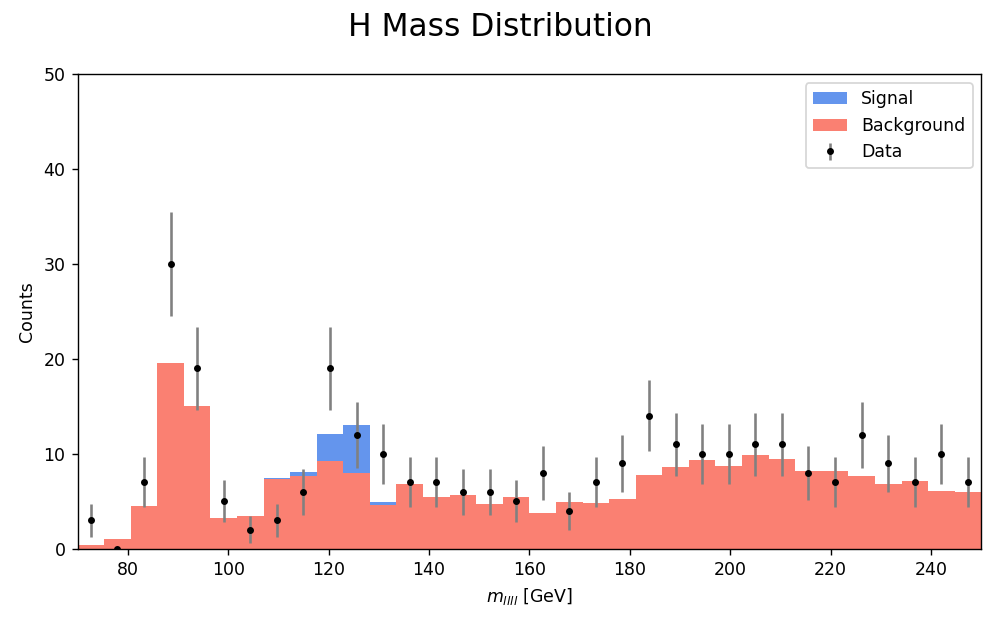

In [59]:
%matplotlib notebook
# split data into simulated and 'real'
sim = V[V['fam'] <= 9]
dat = V[V['fam'] >= 10]
bkg = sim[sim['sig?'] == 0]

nbins = 30
fig, ax = plt.subplots( figsize=(8,5) )
ran = (70, 250)
# simulation plots
ax.hist(sim['m']/1000, bins=nBins, range=ran, weights=sim['w'], 
                       label='Signal', color='cornflowerblue')
ax.hist(bkg['m']/1000, bins=nBins, range=ran, weights=bkg['w'], 
                       label='Background', color='salmon')
# data plots
counts, bins = np.histogram(dat['m']/1000, bins=nBins, range=ran)
cents = ( bins[1:] + bins[:-1] ) / 2
ax.errorbar(cents, counts, yerr=sqrt(counts), fmt='.k', label='Data', ecolor='grey')

ax.set_xlabel(r'$m_{llll}$ [GeV]')
ax.set_ylabel('Counts')
ax.set_xlim(*ran)
ax.set_ylim(0, 50)
ax.legend()
fig.suptitle('H Mass Distribution', fontsize=18)
fig.tight_layout()
fig.show()

# Z Mass Comparison
Plot the mass distribution of the real and virtual Z.

<IPython.core.display.Javascript object>


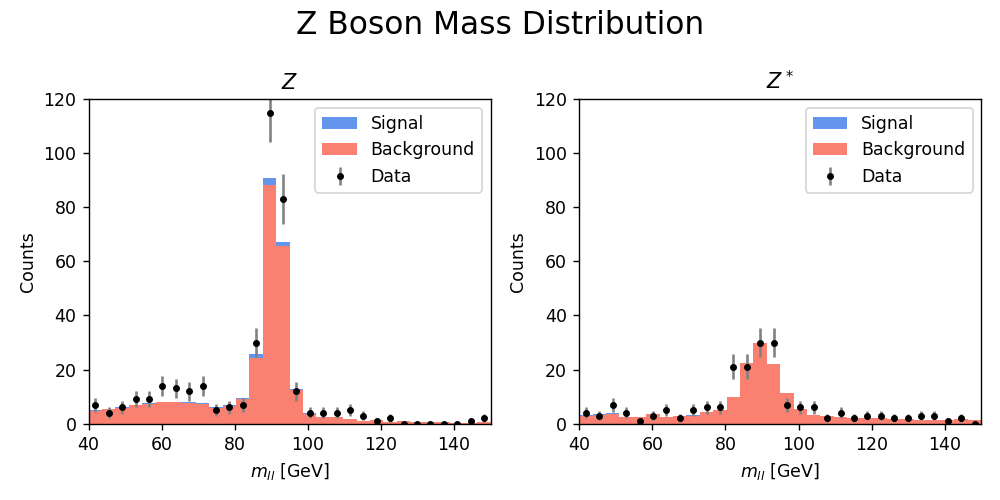

In [60]:
%matplotlib notebook

# function to compare real and virtual z-mass distributions
def plot_z_mass(data: DataFrame=None, nBins: int=None, xlim: tuple=None, ylim: tuple=None):
    sim = data[data['fam'] <= 9]
    dat = data[data['fam'] >= 10]

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    z_descriptions = {0: r'$Z$', 1: r'$Z^*$'}
    ran = (40, 150)
    for i, name in enumerate(['Z0', 'Z1']):
        name += ' m'
        for df, lab in zip([sim, dat], ['MC', 'Data']):
            if lab == 'MC':
                bkg = df[df['sig?'] == 0]
                ax[i].hist(df[name]/1000, bins=nBins, range=xlim, weights=df['w'], 
                           label='Signal', color='cornflowerblue')
                ax[i].hist(bkg[name]/1000, bins=nBins, range=xlim, weights=bkg['w'], 
                           label='Background', color='salmon')
            else:
                counts, bins = np.histogram(df[name]/1000, bins=nBins, 
                                            range=xlim, weights=df['w'])
                cents = ( bins[1:] + bins[:-1] ) / 2
                ax[i].errorbar(cents, counts, yerr=sqrt(counts), fmt='.k', label=lab, ecolor='grey')
            ax[i].set_xlabel(r'$m_{ll}$ [GeV]')
            ax[i].set_ylabel('Counts')
            ax[i].set_xlim(*xlim)
            ax[i].set_ylim(*ylim)
            ax[i].set_title(z_descriptions[i])
            ax[i].legend()
    fig.suptitle('Z Boson Mass Distribution', fontsize=18)
    fig.tight_layout()
    fig.show()
    
plot_z_mass(data=V, nBins=30, xlim=(40, 150), ylim=(0, 120))

The standard model simulation seeems to match the mass distribution of the virtual boson better than that of the Z-boson. The distribution of the real Z is clearly more sharply peaked around the known Z-mass (~91 GeV). However, this does not yield much information on the efficacy of the pairing algorithm, i.e., whether or not it effectively determined the correct pairing of the leptons.

# Z Scatter Angles
The following plots show the distribution of the 2 Z angles, which are the angles that the momentum vector of the Z bosons make with the momentum vector of their parent Higgs. Note that the indices in the figure on the right are merely to label the particles consistently with the variable names in the notebook, and do not have any physical meaning.
<table><tr><td><img src='hzz.png' width="290"></td><td><img src="H-ZZ-llll.drawio.png" width=300></td></tr></table>

<IPython.core.display.Javascript object>


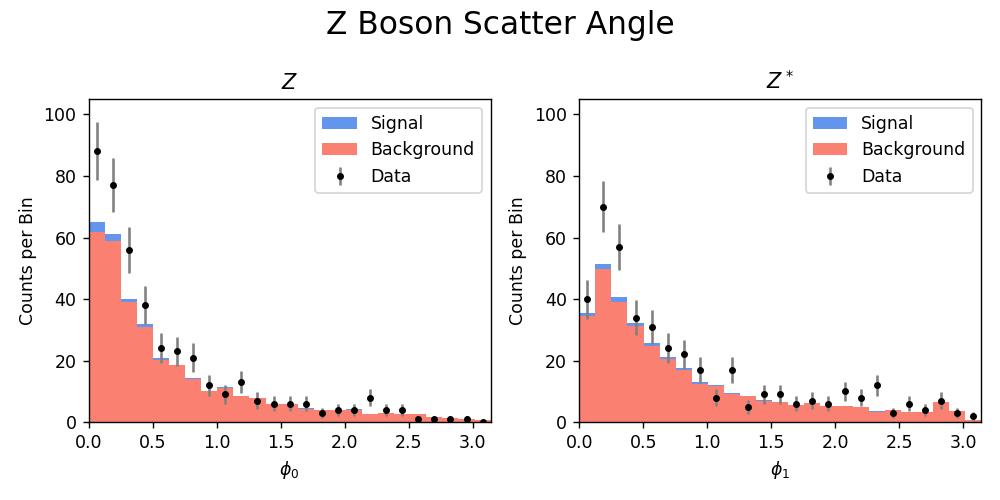

In [61]:
%matplotlib notebook
# function to compare z angles
def plot_z_angles(data: DataFrame=None, nBins: int=None, xlim: tuple=None, ylim: tuple=None):
    sim = data[data['fam'] <= 9]
    dat = data[data['fam'] >= 10]
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    z_descriptions = {0: r'$Z$', 1: r'$Z^*$'}
    
    for i, name in enumerate(['Z0', 'Z1']):
        name += ' a'
        for df, lab in zip([sim, dat], ['MC', 'Data']):
            if lab == 'MC':
                bkg = df[df['sig?'] == 0]
                ax[i].hist(df[name], bins=nBins, range=xlim, weights=df['w'], 
                           label='Signal', color='cornflowerblue')
                ax[i].hist(bkg[name], bins=nBins, range=xlim, weights=bkg['w'], 
                           label='Background', color='salmon')
            else:
                counts, bins = np.histogram(df[name], bins=nBins, 
                                            range=xlim, weights=df['w'])
                cents = ( bins[1:] + bins[:-1] ) / 2
                ax[i].errorbar(cents, counts, yerr=sqrt(counts), fmt='.k', label=lab, ecolor='grey')
            ax[i].set_xlabel(r'$\phi$'+f'$_{i}$')
            ax[i].set_ylabel('Counts per Bin')
            ax[i].set_xlim(*xlim)
            ax[i].set_ylim(*ylim)
            ax[i].set_title(z_descriptions[i])
            ax[i].legend()
    fig.suptitle('Z Boson Scatter Angle', fontsize=18)
    fig.tight_layout()
    fig.show()
    
plot_z_angles(data=V, nBins=25, xlim=(0, pi), ylim=(0, 105))

# Lepton Scatter Angles
These plots show the distribution of the 4 lepton angles, which are the angles that the momentum vector of each lepton makes with the momentum vector of its parent Z.

<IPython.core.display.Javascript object>


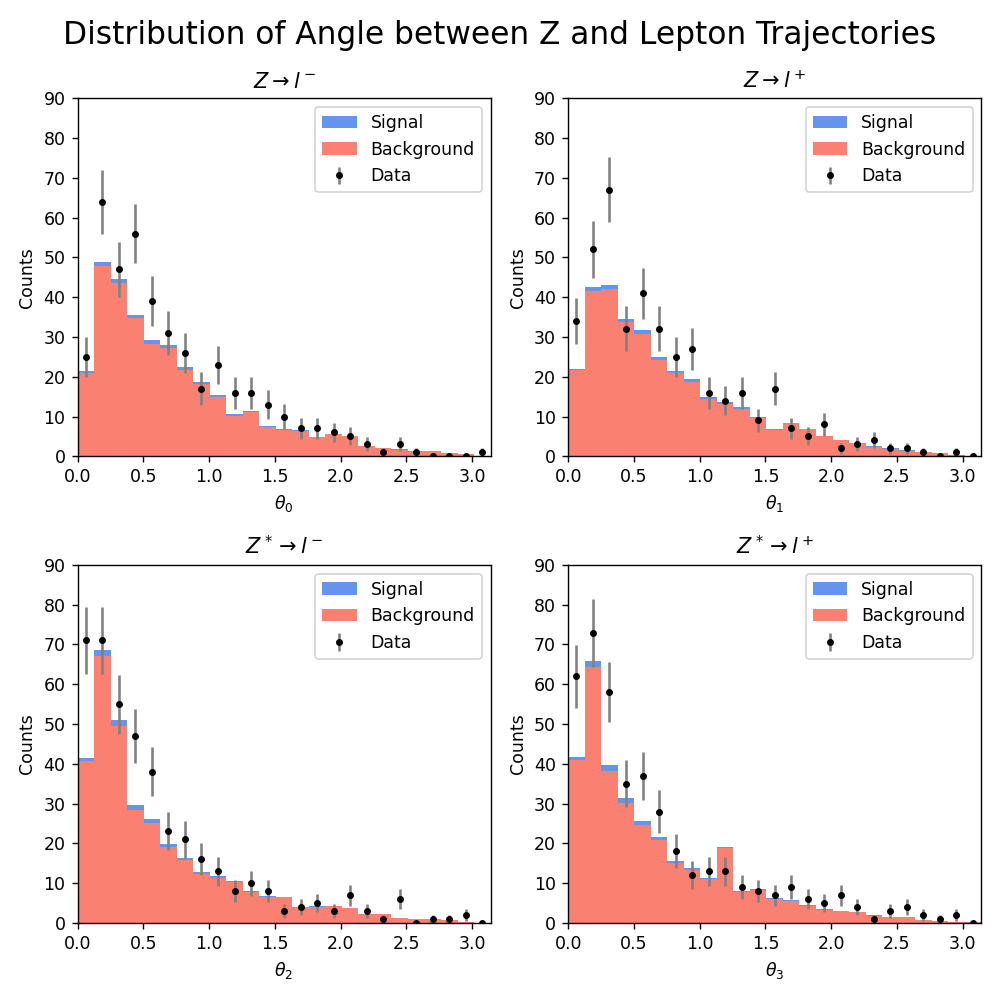

In [62]:
%matplotlib notebook
# lepton angles
def plot_lep_angles(data: DataFrame=None, nBins: int=None, xlim: tuple=None, ylim: tuple=None):
    sim = data[data['fam'] <= 9]
    dat = data[data['fam'] >= 10]

    fig, ax = plt.subplots(2, 2, figsize=(8, 8))
    ax = {0: ax[0,0], 1: ax[0,1], 2: ax[1,0], 3: ax[1,1]}
    lepton_descriptions = {0: r'$Z \rightarrow l^-$', 1: r'$Z \rightarrow l^+$',
                           2: r'$Z^* \rightarrow l^-$', 3: r'$Z^* \rightarrow l^+$'}

    for i, name in enumerate(['L0', 'L1', 'L2', 'L3']):
        name += ' a'
        for df, lab in zip([sim, dat], ['MC', 'Data']):
            if lab == 'MC':
                bkg = df[df['sig?'] == 0]
                ax[i].hist(df[name], bins=nBins, range=xlim, weights=df['w'], 
                           label='Signal', color='cornflowerblue')
                ax[i].hist(bkg[name], bins=nBins, range=xlim, weights=bkg['w'], 
                           label='Background', color='salmon')
            else:
                counts, bins = np.histogram(df[name], bins=nBins, range=xlim, weights=df['w'])
                cents = ( bins[1:] + bins[:-1] ) / 2
                ax[i].errorbar(cents, counts, yerr=sqrt(counts), fmt='.k', label=lab, ecolor='grey')
        ax[i].set_xlabel(r'$\theta$'+f'$_{i}$')
        ax[i].set_ylabel('Counts')
        ax[i].set_xlim(*xlim)
        ax[i].set_ylim(*ylim)
        ax[i].legend()
        ax[i].set_title(lepton_descriptions[i])
    fig.suptitle('Distribution of Angle between Z and Lepton Trajectories', fontsize=18)
    fig.tight_layout()
    fig.show()
    
plot_lep_angles(data=V, nBins=25, xlim=(0, pi), ylim=(0, 90))

Once again, the SM simulation clearly matches the angles from the virtual boson (bottom row) better than those from the real (top row).

<IPython.core.display.Javascript object>


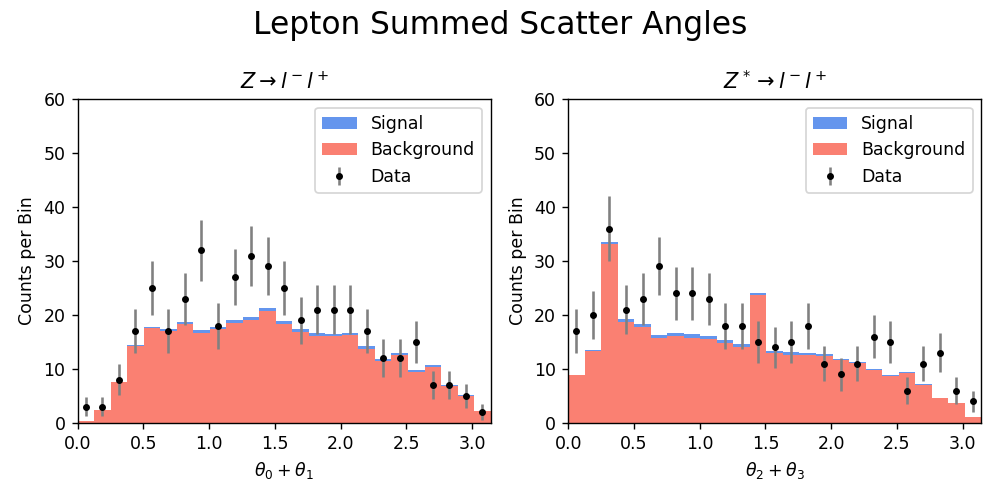

In [63]:
%matplotlib notebook
# summed lep angles around each Z
def plot_comb_lep_angles(data: DataFrame=None, nBins: int=None, 
                         xlim: tuple=None, ylim: tuple=None):
    sim = data[data['fam'] <= 9]
    dat = data[data['fam'] >= 10]

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    z_descriptions = {0: r'$Z \rightarrow l^- l^+$', 1: r'$Z^* \rightarrow l^- l^+$'}
    
    for i, name in enumerate(['Z0', 'Z1']):
        name += ' a'
        for df, lab in zip([sim, dat], ['MC', 'Data']):
            name1 = 'L' + str(2*i) + ' a'
            name2 = 'L' + str(2*i + 1) + ' a'
            if lab == 'MC':
                bkg = df[df['sig?'] == 0]
                ax[i].hist(df[name1] + df[name2], bins=nBins, range=xlim, weights=df['w'], 
                           label='Signal', color='cornflowerblue')
                ax[i].hist(bkg[name1] + bkg[name2], bins=nBins, range=xlim, weights=bkg['w'], 
                           label='Background', color='salmon')
            else:
                counts, bins = np.histogram(df[name1] + df[name2], bins=nBins, 
                                            range=xlim, weights=df['w'])
                cents = ( bins[1:] + bins[:-1] ) / 2
                ax[i].errorbar(cents, counts, yerr=sqrt(counts), fmt='.k', label=lab, ecolor='grey')
            ax[i].set_xlabel(r'$\theta$'+f'$_{2*i} +$' + r'$\theta$'+f'$_{2*i+1}$')
            ax[i].set_ylabel('Counts per Bin')
            ax[i].set_xlim(*xlim)
            ax[i].set_ylim(*ylim)
            ax[i].set_title(z_descriptions[i])
            ax[i].legend()
    fig.suptitle('Lepton Summed Scatter Angles', fontsize=18)
    fig.tight_layout()
    fig.show()

plot_comb_lep_angles(data=V, nBins=25, xlim=(0, pi), ylim=(0, 60))

# Test Accuracy of Lepton Pairing
As we know how leptons must be paired in EEUU events, we can pair them by using the z-mass algorithm (used in EEEE and UUUU cases) and compare the results.

In [64]:
# read in the mass-paired eeuu events
eeuu = pd.read_csv('eeuu.csv')

# this dataframe is all the cases in which the mass-pairing failed on the eeuu events
miss = eeuu[eeuu['L0 type'] != eeuu['L1 type']]

In [65]:
# compare number of events
print('Total Events Frac:')
p = 1 - len(miss) / len(eeuu)
print( str(np.round(100*p, 2)) + '%' )

# compare number of non-mc events
print('\nData Events Frac:')
p = 1 - len( miss[miss['fam'] >= 10] ) / len( eeuu[eeuu['fam'] >= 10] )
print( str(np.round(100*p, 2)) + '%' )

# compare number of non-mc signal events
print('\nData Signal Counts Frac:')
p = 1 - len( miss[abs(miss['m'] - 125000) < 5000] ) / len( eeuu[abs(eeuu['m'] - 125000) < 5000] )
print( str(np.round(100*p, 2)) + '%' )

# compare total weights
print('\nMC Weights Frac:')
p = 1 - miss['w'].sum() / eeuu['w'].sum()
print( str(np.round(100*p, 2)) + '%' )

# compare total weights of events recognized as signal
print('\nMC Signal Counts Frac:')
p = 1 - ( miss['w'] * miss['sig?'] ).sum() / ( eeuu['w']*eeuu['sig?'] ).sum()
print( str(np.round(100*p, 2)) + '%' )

Total Events Frac:
56.93%

Data Events Frac:
57.64%

Data Signal Counts Frac:
77.53%

MC Weights Frac:
55.82%

MC Signal Counts Frac:
79.93%


While overall it is only correct ~57% of the time, it has a ~78% efficiency on the signal events. 

The 57% general efficiency is far from ideal. However, it is also expected. The pairing algorithm runs on the principle that a Higgs boson can't decay to 2 real Z bosons, but this constraint is not applicable in background cases which are not necessarily from H-ZZ.

The 78% signal efficiency is a lot better, but not good enough to remove the pursuit for a better pairing method. 

With these results in mind, the angle plots shown above are not particularly above, as the efficiency of the overall pairing can be estimated as:
$$E_{llll} = \frac{E_{MC}\sum_{i}{w_i} + E_{data}N_{data}}{\sum_{i}{w_i} + N_{data}}$$

The overall efficiency can then be estimated:
$$E_{T} = \frac{ E_{llll}N_{llll} + E_{ee\mu\mu}N_{ee\mu\mu} }{ N_{llll} + N_{ee\mu\mu} }$$
Assuming $E_{ee\mu\mu}=1$, we get:

In [66]:
# carry out above calculation
p = (eeuu['w'].sum() - miss['w'].sum()) + (len(eeuu[eeuu['fam'] >= 10]) - len( miss[miss['fam'] >= 10] ))
E_llll = p / (eeuu['w'].sum() + len(eeuu[eeuu['fam'] >= 10]))
print('EEEE/UUUU General Pairing Efficiency')
print( str(np.round(100*E_llll, 2)) + '%' )

E_T = ( E_llll*( len(V) - len(eeuu) ) + len(eeuu) ) / len(V)
print('\nTotal General Pairing Efficiency:')
print( str(np.round(100*E_T, 2)) + '%' )

EEEE/UUUU General Pairing Efficiency
56.46%

Total General Pairing Efficiency:
81.82%


In [67]:
# efficiency check but for signal events
p1 = ( eeuu['w'] * eeuu['sig?'] ).sum()
p2 = ( miss['w'] * miss['sig?'] ).sum()
p3 = len( eeuu[ ( eeuu['fam'] >= 10 ) & ( abs(eeuu['m'] - 125000) < 5000 ) ] ) 
p4 = len( miss[ ( miss['fam'] >= 10 ) & ( abs(miss['m'] - 125000) < 5000 ) ] )

E_llll = (p1 - p2 + p3 - p4) / (p1 + p3)
print('EEEE/UUUU Signal Pairing Efficiency')
print( str(np.round(100*E_llll, 2)) + '%' )

len_tot = len( V[ ( abs(V['m'] - 125000) < 5000 ) ] )
len_eeuu = len( eeuu[ ( abs(eeuu['m'] - 125000) < 5000 ) ] )
len_llll = len_tot - len_eeuu
E_T = ( E_llll*len_llll + len_eeuu ) / len_tot
print('\nTotal Signal Pairing Efficiency:')
print( str(np.round(100*E_T, 2)) + '%' )

EEEE/UUUU Signal Pairing Efficiency
88.34%

Total Signal Pairing Efficiency:
95.36%


# Analyse Signal Angles

In [73]:
# signal events
dat_cut = ( (V['fam'] >= 10) & (abs(V['m'] - 125000) < 5000))
sim_cut = ( (V['fam'] < 10) & (V['sig?'] == 1) )

VS = V[ (abs(V['m'] - 125000) < 5000) ]
VS

,id,L0 type,L0 E,L0 Q,L0 px,L0 py,L0 pz,L0 p,L0 a,L1 type,...,E,Q,w,sig?,fam,px,py,pz,p,m
15,15.0,11.0,83534.148438,-1.0,29277.619596,27180.538412,73362.073908,83534.152092,0.546963,11.0,...,214140.300781,0.0,0.267047,0.0,0.0,-14676.936055,13985.359596,173869.619695,175047.557503,123346.751197
20,20.0,11.0,38104.433594,-1.0,19563.018606,-10884.874884,-30834.327994,38104.435189,2.846979,11.0,...,131117.854492,0.0,0.150119,0.0,0.0,-630.421467,9794.643783,-15159.192977,18059.169687,129868.233825
27,27.0,11.0,36104.421875,-1.0,26856.235143,23958.783281,2872.016992,36104.420006,2.114254,11.0,...,141110.359375,0.0,0.295553,0.0,0.0,-9202.766271,-645.752969,66152.596922,66792.768946,124301.486473
33,33.0,11.0,59752.582031,-1.0,15877.457554,-43040.979350,38285.135216,59752.582709,0.748892,11.0,...,187333.636719,0.0,0.154644,0.0,0.0,-3140.841472,950.671369,142710.971928,142748.695861,121312.411881
35,35.0,11.0,41257.179688,-1.0,40439.875051,6379.738660,5105.905068,41257.179086,1.033772,11.0,...,155533.411133,0.0,0.083962,0.0,0.0,24894.512067,18557.834886,93502.841452,98523.658713,120348.372039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818056,818056.0,11.0,216553.062500,-1.0,-38918.202316,-18926.732536,212184.773605,216553.055453,0.190576,11.0,...,348902.417969,0.0,1.000000,0.0,13.0,5089.292424,-10214.805259,324075.937431,324276.820580,128753.411212
818062,818062.0,11.0,64404.058594,-1.0,19135.255844,-28580.934766,-54450.479062,64404.056692,0.505521,11.0,...,699102.832031,0.0,1.000000,0.0,13.0,-71133.802992,-182385.597294,-659442.416105,687887.217635,124723.476410
818069,818069.0,11.0,101029.000000,-1.0,26805.488369,56624.233078,-79259.198729,101028.998617,0.242817,11.0,...,173918.410156,0.0,1.000000,0.0,13.0,46230.257174,90165.302746,-72954.401795,124857.371585,121071.260637
818073,818073.0,13.0,89211.695312,-1.0,4119.308537,46956.387086,75741.962653,89211.635438,0.501137,13.0,...,199373.919922,0.0,1.000000,0.0,13.0,-2392.712106,27342.582665,150659.536197,153139.275645,127664.882407


<IPython.core.display.Javascript object>


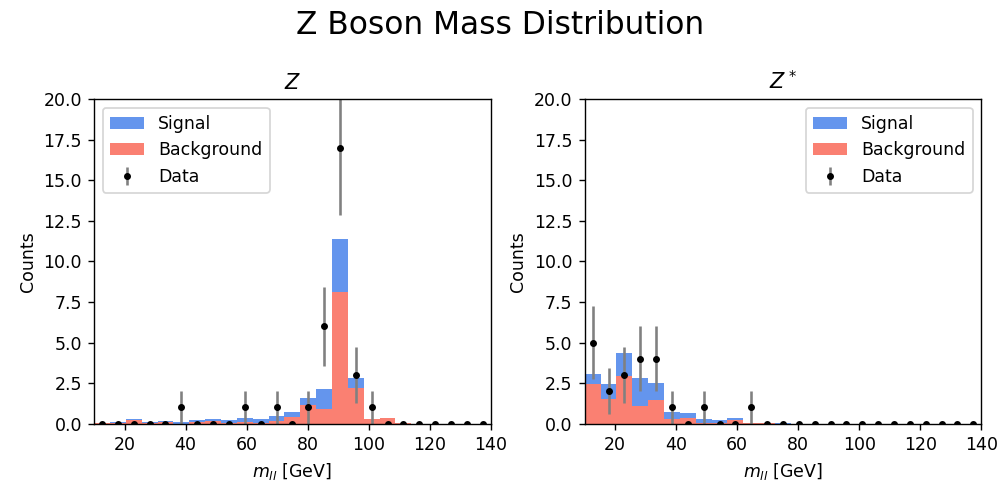

In [74]:
plot_z_mass(data=VS, nBins=25, xlim=(10, 140), ylim=(0, 20))

<IPython.core.display.Javascript object>


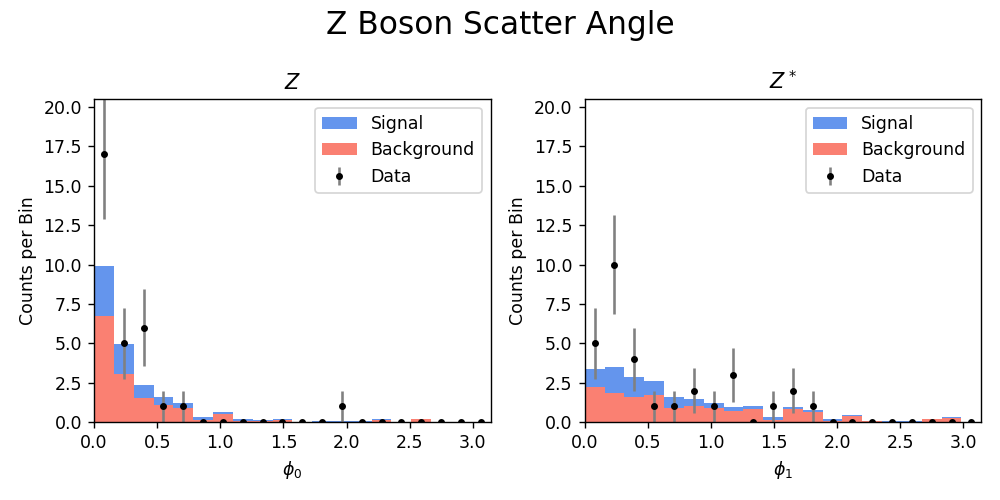

In [75]:
plot_z_angles(data=VS, nBins=20, xlim=(0, pi), ylim=(0, 20.5))

<IPython.core.display.Javascript object>


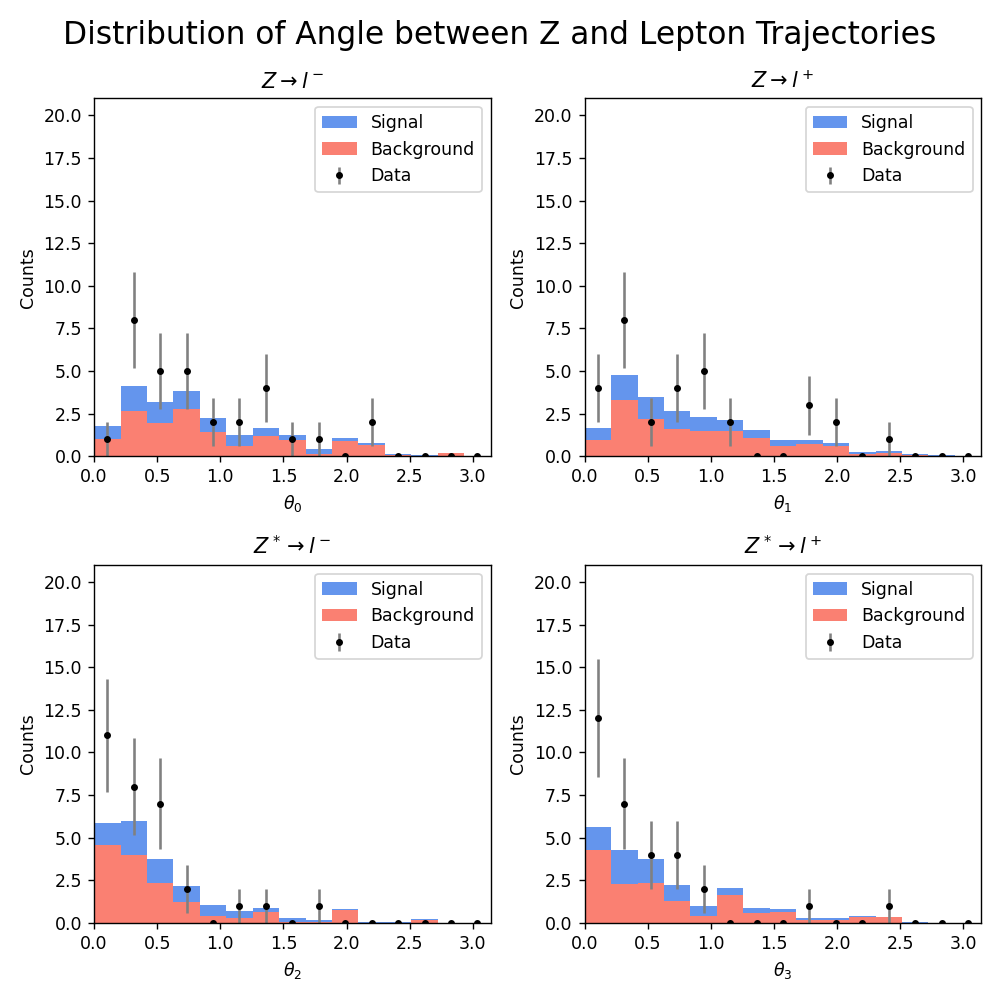

In [76]:
plot_lep_angles(data=VS, nBins=15, xlim=(0, pi), ylim=(0, 21))

<IPython.core.display.Javascript object>


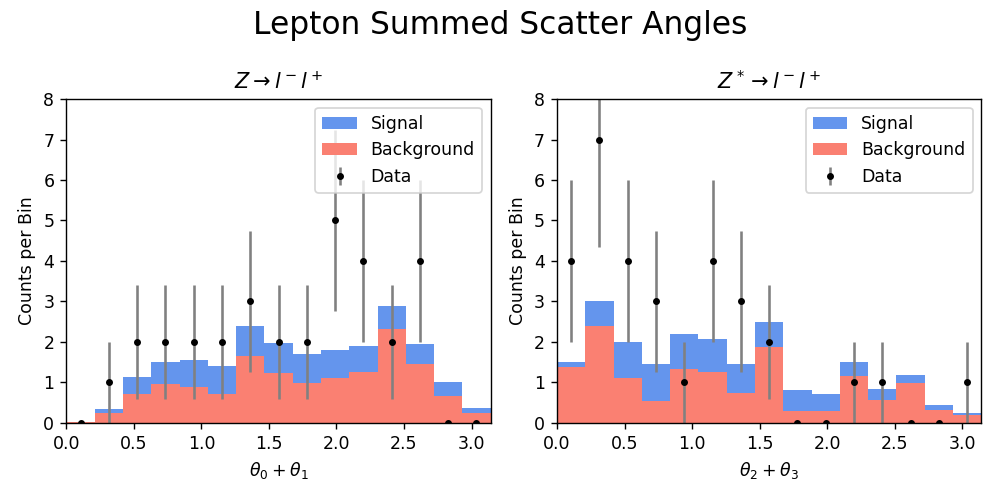

In [77]:
plot_comb_lep_angles(data=VS, nBins=15, xlim=(0, pi), ylim=(0, 8))

# Ideas and General Notes
* **Ideas:**
    * I think a single thing that could benefit this analysis most is a more efficient way, as this would allow us to compare the signal and background angles of the full dataset. Currently, as far as I can think, a signal vs background comparison is only valid for the EEUU subset, as this is the only case in which we can still pair background leptons. Pairing background leptons on EEEE/UUUU subsets is a game of chance, currently.
    
* **Notes:**
    * For the signal angle plots above, should I reduce the number of bins? As it does not feel accurate to estimate the uncertainty using a Poisson distribution for bins which have very low counts (1, 2, etc). Furthermore, 0 uncertainty on bins with 0 counts is also not accurate. Maybe I could increase the binwidth slightly, and then have 'collective bins' for all the cases above/below a certain upper/lower bound.